# Examples of using mobile traffic datasets
---
Digitized traffic data can be combined into times series with addition of traffic trends and anomalies.


**Version history**  
2021-01-21: Initial version  
2021-03-22: Updated traffic.csv dataset and trafficds interfaces  
2021-04-16: Tested after trafficds updates  

In [16]:
import pandas as pd
import numpy as np

# Main import with traffic datasets functions
import trafficds as tds
# Init location of the main data CSV file
tds.file_traffic_csv = 'data/traffic.csv'

Dataset categories: daily and weekly datasets

In [17]:
tds.ds_traffic

{'daily': ['laner12',
  'earth12',
  'feknous14_orange_ds_fixed',
  'feknous14_orange_ds_mobile',
  'feknous14_orange_us_fixed',
  'feknous14_orange_us_mobile',
  'wang15_avg',
  'wang15_park',
  'wang15_campus',
  'wang15_cbd',
  'xu17_daily',
  'okic19_2_hour',
  'okic19_2_min',
  'wkdy_trinh17_1',
  'wkdy_trinh17_2',
  'wknd_trinh17_1',
  'wknd_trinh17_2',
  'wknd_feldmann_isp_ce_feb22',
  'wkdy_feldmann_isp_ce_mar25',
  'wkdy_moreira_pre_lock_feb19',
  'wkdy_moreira_pre_lock_may19',
  'wkdy_moreira_pre_lock_jul19',
  'wkdy_moreira_pre_lock_oct19',
  'wknd_moreira_pre_lock_feb19',
  'wknd_moreira_pre_lock_may19',
  'wknd_moreira_pre_lock_jul19',
  'wknd_moreira_pre_lock_oct19',
  'wkdy_moreira_lock_mar20',
  'wkdy_moreira_lock_apr20',
  'wkdy_moreira_lock_may20',
  'wkdy_moreira_lock_jun20',
  'wknd_moreira_lock_mar20',
  'wknd_moreira_lock_apr20',
  'wknd_moreira_lock_may20',
  'wknd_moreira_lock_jun20'],
 'weekly': ['xu17',
  'xu17_residential',
  'xu17_office',
  'xu17_transport'

Load traffic time series from CSV file.

In [18]:
df = pd.read_csv('data/traffic.csv')

Take a look at the data columns.

In [19]:
list(df.columns)[:15]

['t_day',
 'thp_laner12',
 'thp_earth12',
 'thp_xu17_daily',
 'thp_mon_xu17',
 'thp_tue_xu17',
 'thp_wed_xu17',
 'thp_thu_xu17',
 'thp_fri_xu17',
 'thp_sat_xu17',
 'thp_sun_xu17',
 'thp_mon_xu17_residential',
 'thp_tue_xu17_residential',
 'thp_wed_xu17_residential',
 'thp_thu_xu17_residential']

### Combining multiple traffic series
---
Combine weekly traffic datasets: the period length in weeks is indicated inside the parentheses.

In [20]:
sigma = 10
thp_max = 250

# Normal traffic growth 30% anually
normal_inc_day = 0.30 / 365
# Anomalous trend increase, 20% per week  
anom_inc_day = 0.2 / 7

# Traffic trend increase -- construct array for each day
inc_day = 4*7*[normal_inc_day] + 4*7*[anom_inc_day] + 4*7*[normal_inc_day]

df_gen = tds.combine_traffic(
    [('xu17_residential', 4), # weeks
     ('italy_mar', 4),        # weeks
     ('xu17_residential', 4), # weeks
    ], df, day_trend=inc_day, max_thp_mbps=90, coeff_wknd=0.8)    


# Adding lognormal traffic variations
tds.thp_add_randvar(df_gen, sigma, thp_max)


In [21]:
df_gen

,t_day,thp_mbps,thp_var_mbps
0,0.000000,47.516701,36.272836
1,0.006944,45.976583,37.219446
2,0.013889,44.436465,21.934545
3,0.020833,42.896348,44.142653
4,0.027778,41.356230,51.845203
...,...,...,...
12091,83.965278,139.740338,113.789524
12092,83.972222,136.345590,152.821756
12093,83.979167,145.332137,147.080379
12094,83.986111,128.115100,101.591829


Plot traffic mean value and lognormal variations over a whole combined period.

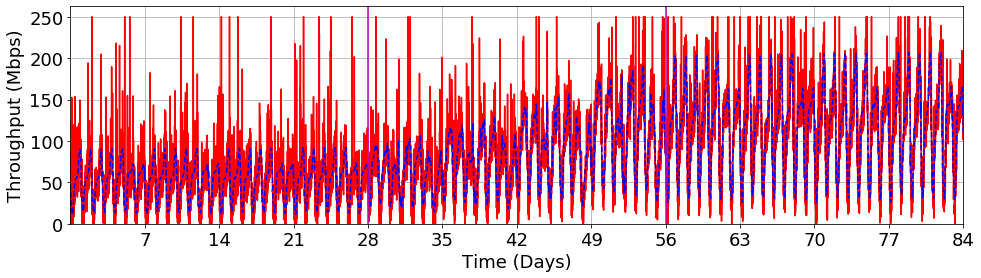

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 4))
plt.plot(df_gen.t_day.to_numpy(), df_gen.thp_var_mbps.to_numpy(), 'r-')
plt.plot(df_gen.t_day.to_numpy(), df_gen.thp_mbps.to_numpy(), 'b--')

ax = plt.gca()
ax.set_xticks(np.arange(1, 13)*7, minor=False)

plt.axvline(4*7, c='m')
plt.axvline(8*7, c='m')
plt.xlabel('Time (Days)')
plt.ylabel('Throughput (Mbps)')
plt.xlim(0, 12*7)
plt.ylim(0)
plt.grid()


### Combining weekly and daily traffic
---
Combine the following traffic sequence: two weeks of weekly dataset folowed by 7, 5 and 2 days of daily datasets.

In [23]:
inc_day = 2*7*[normal_inc_day] + 2*7*[anom_inc_day]
    
df_gen = tds.combine_traffic([('xu17_residential', 2), # weeks
                              ('laner12', 7),          # days
                              ('wkdy_trinh17_2', 5),   # days
                              ('wknd_trinh17_2', 2)    # days
                             ], df, day_trend=inc_day, max_thp_mbps=90, coeff_wknd=0.8)    

Plot the mean level of traffic profile.

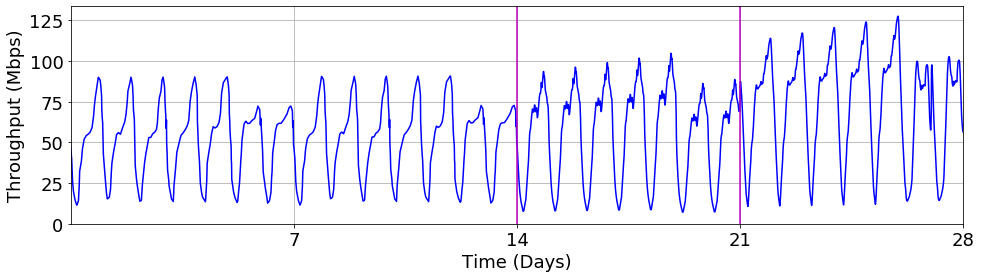

In [24]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 4))
plt.plot(df_gen.t_day.to_numpy(), df_gen.thp_mbps.to_numpy(), 'b-')

ax = plt.gca()
ax.set_xticks(np.arange(1, 5)*7, minor=False)

plt.axvline(2*7, c='m')
plt.axvline(3*7, c='m')
plt.xlabel('Time (Days)')
plt.ylabel('Throughput (Mbps)')
plt.xlim(0, 28)
plt.ylim(0)
plt.grid()


### Adding traffic anomalies 
---
Here we will combine two traffic datasets and two traffic anomalies each 4 hours long accuring at day 11 and day 17.

In [25]:
inc_day = 2*7*[normal_inc_day] + 2*7*[anom_inc_day]

df_gen = tds.combine_traffic(
    [('xu17_residential', 2), # weeks
     ('italy_mar', 2),   # weeks
    ], df, day_trend=inc_day, max_thp_mbps=90, coeff_wknd=0.8)    

# Adding anomalous throughput - day 10
thp_adiff = 40
astart_day = 10.5
aend_day   = 10.5 + 4./24
tds.thp_add_anomaly(df_gen, thp_adiff, astart_day, aend_day)

# Adding anomalous throughput - day 16
astart_day = 16.5
aend_day   = 16.5 + 4./24
tds.thp_add_anomaly(df_gen, thp_adiff, astart_day, aend_day)

# Adding lognormal traffic variations
tds.thp_add_randvar(df_gen, sigma, thp_max)


Generated pandas dataframe contains columns `thp_a_mbps` and `thp_a_var_mbps` with mean anomalous traffic and anomaly with lognormal traffic variations, respectively.

In [26]:
df_gen.columns

Index(['t_day', 'thp_mbps', 'thp_a_mbps', 'thp_var_mbps', 'thp_a_var_mbps'], dtype='object')

Lets plot traffic anomalies indicated by dotted green lines.

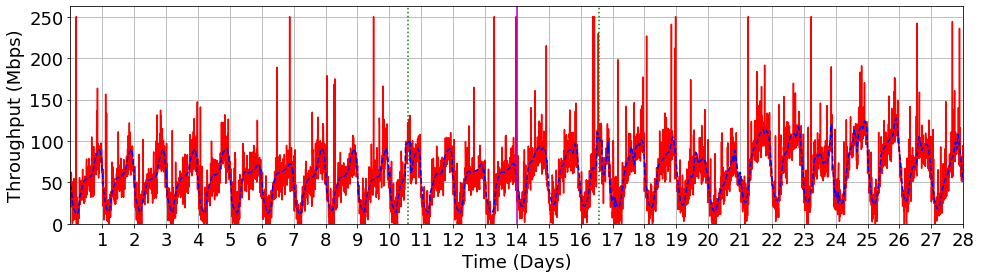

In [27]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 4))
plt.plot(df_gen.t_day.to_numpy(), df_gen.thp_a_var_mbps.to_numpy(), 'r-')
plt.plot(df_gen.t_day.to_numpy(), df_gen.thp_a_mbps.to_numpy(), 'b--')

ax = plt.gca()
ax.set_xticks(np.arange(1, 4*7+1), minor=False)

plt.axvline(14, c='m')
plt.axvline(10.5 + 2/24, c='g', ls=':')
plt.axvline(16.5 + 2/24, c='g', ls=':')

plt.xlabel('Time (Days)')
plt.ylabel('Throughput (Mbps)')
plt.xlim(0, 28)
plt.ylim(0)
plt.grid()


### Generate dataset for training ML models 
---
For machine learning applications, a dataset can be generated with randoly ordered data as square matrix: each row corresponds to a single time series, and columns indicate time moments.

In [28]:
nweeks = 2
series = tds.gen_dataset(nweeks=nweeks, sigma=20, thp_max=200)
series.shape

(40, 2016)

Plot generated time series.

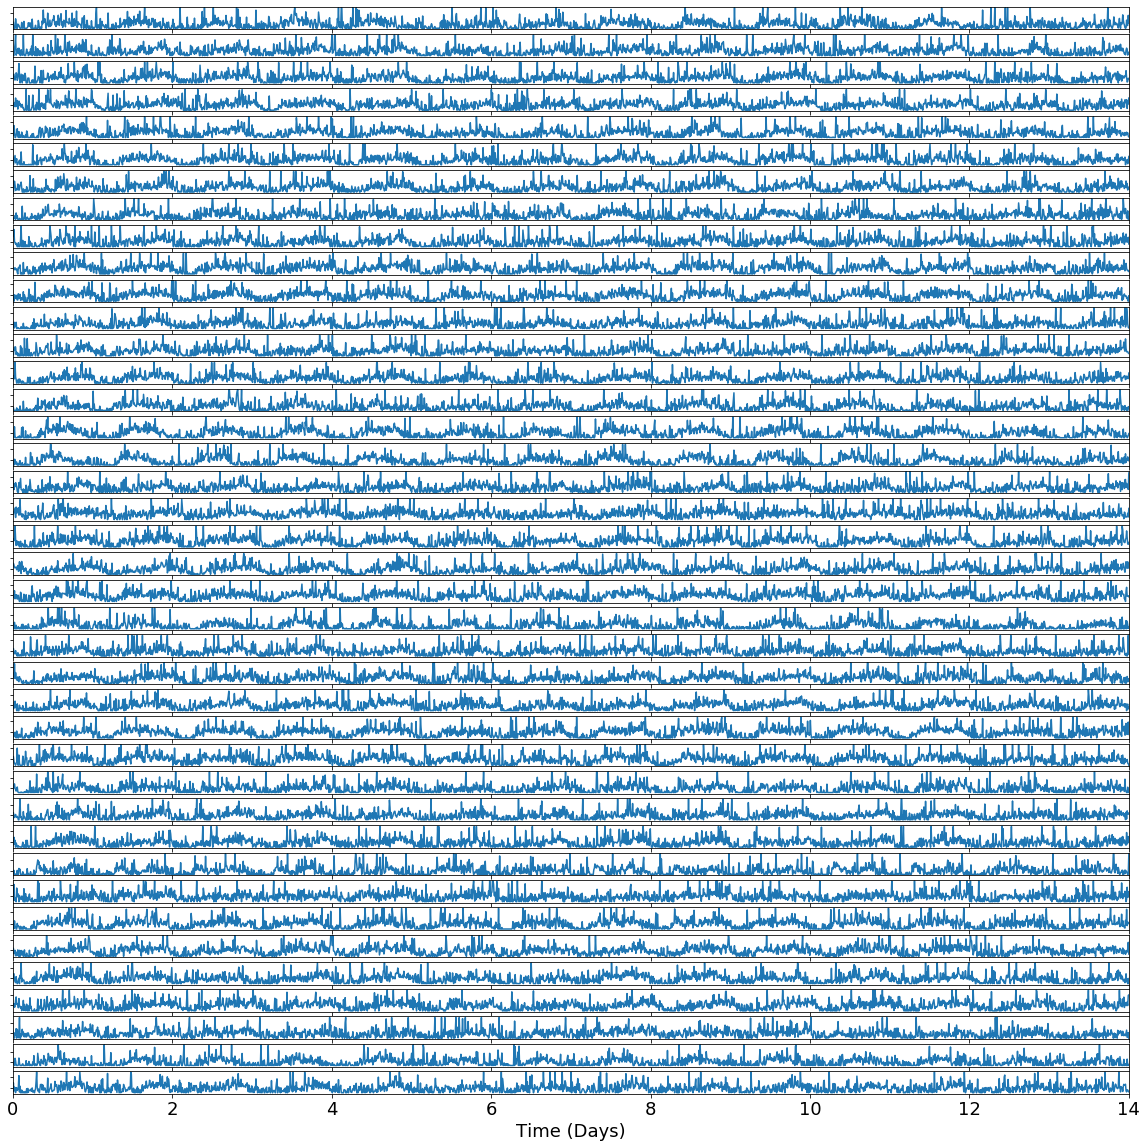

In [29]:
# Time array in days
tdays = np.linspace(0, nweeks*7, nweeks*7*24*6)

fig, ax = plt.subplots(series.shape[0], 1, figsize=(20, 20))
for i in range(series.shape[0]):
    ax[i].plot(tdays, series[i, ...])
    ax[i].set_xlim(0, nweeks*7)
    if i < series.shape[0] - 1:
        ax[i].set_xticklabels([])
    else:    
        ax[i].set_xlabel('Time (Days)')
    ax[i].set_yticklabels([])